In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,12)})
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd  
import folium
import branca
import branca.colormap as cm

In [2]:
# Load full Data
df_full = pd.read_csv('data/processed/SimpleNNData.csv', index_col=0, parse_dates=[1])
weather_var = list(df_full.columns[-22:-1])
df_full

index  time_to_reservation  leave_fuel     degree  weekend  \
0      2019-08-15             7.722778          30  12.529378        0   
1      2019-08-15             6.774445          86  14.027280        0   
2      2019-08-15             6.522222           4  17.751882        0   
3      2019-08-15             5.100833          30   1.806991        0   
4      2019-08-15             6.211945          32  13.214864        0   
...           ...                  ...         ...        ...      ...   
326587 2019-12-19             6.307500          94  20.556195        0   
326588 2019-12-19             7.528611          59  14.221806        0   
326589 2019-12-19             7.865556          48  16.451925        0   
326590 2019-12-19             5.028056          23  15.140361        0   
326591 2019-12-19             0.312222          76   9.196065        0   

        Time_Cos  Time_Sin  hour_index  eng_118I  eng_COOPER  ...  \
0       1.000000  0.000364    6.618094         0           0  ...   
1       0.999999  0.001018    6.618094         0           0  ...   
2       0.999997  0.002327    6.618094         1           0  ...   
3       0.999968  0.007999    6.618094         0           0  ...   
4       0.999957  0.009236    6.618094         0           1  ...   
...          ...       ...         ...       ...         ...  ...   
326587  0.999934 -0.011490    6.318741         0           0  ...   
326588  0.999970 -0.007708    6.318741         1           0  ...   
326589  0.999980 -0.006327    6.318741         1           0  ...   
326590  0.999990 -0.004363    6.318741         0           0  ...   
326591  0.999993 -0.003854    6.318741         1           0  ...   

        Avg_mean_relative_hum  Avg_mean_cloud_cover  Avg_Index_mean_temp  \
0                   73.877778             79.444444            14.775000   
1                   74.612500             85.125000            14.775000   
2                   74.612500             85.125000            14.775000   
3                   74.866667             81.166667            14.775000   
4                   75.128571             83.571429            14.775000   
...                       ...                   ...                  ...   
326587              96.385714             41.857143             4.214286   
326588              96.155556             38.222222             4.214286   
326589              96.155556             38.222222             4.214286   
326590              96.183333             33.833333             4.214286   
326591              94.200000             50.000000             4.214286   

        Avg_Index_mean_wind_speed  Avg_Index_acc_precip  \
0                        1.487500                   0.0   
1                        1.487500                   0.0   
2                        1.487500                   0.0   
3                        1.487500                   0.0   
4                        1.487500                   0.0   
...                           ...                   ...   
326587                   2.071429                   0.0   
326588                   2.071429                   0.0   
326589                   2.071429                   0.0   
326590                   2.071429                   0.0   
326591                   2.071429                   0.0   

        Avg_Index_bright_sunshine  Avg_Index_mean_pressure  \
0                             0.0              1013.050000   
1                             0.0              1013.050000   
2                             0.0              1013.050000   
3                             0.0              1013.050000   
4                             0.0              1013.050000   
...                           ...                      ...   
326587                        0.0              1019.414286   
326588                        0.0              1019.414286   
326589                        0.0              1019.414286   
326590                        0.0              1019.

## Time to Reservation

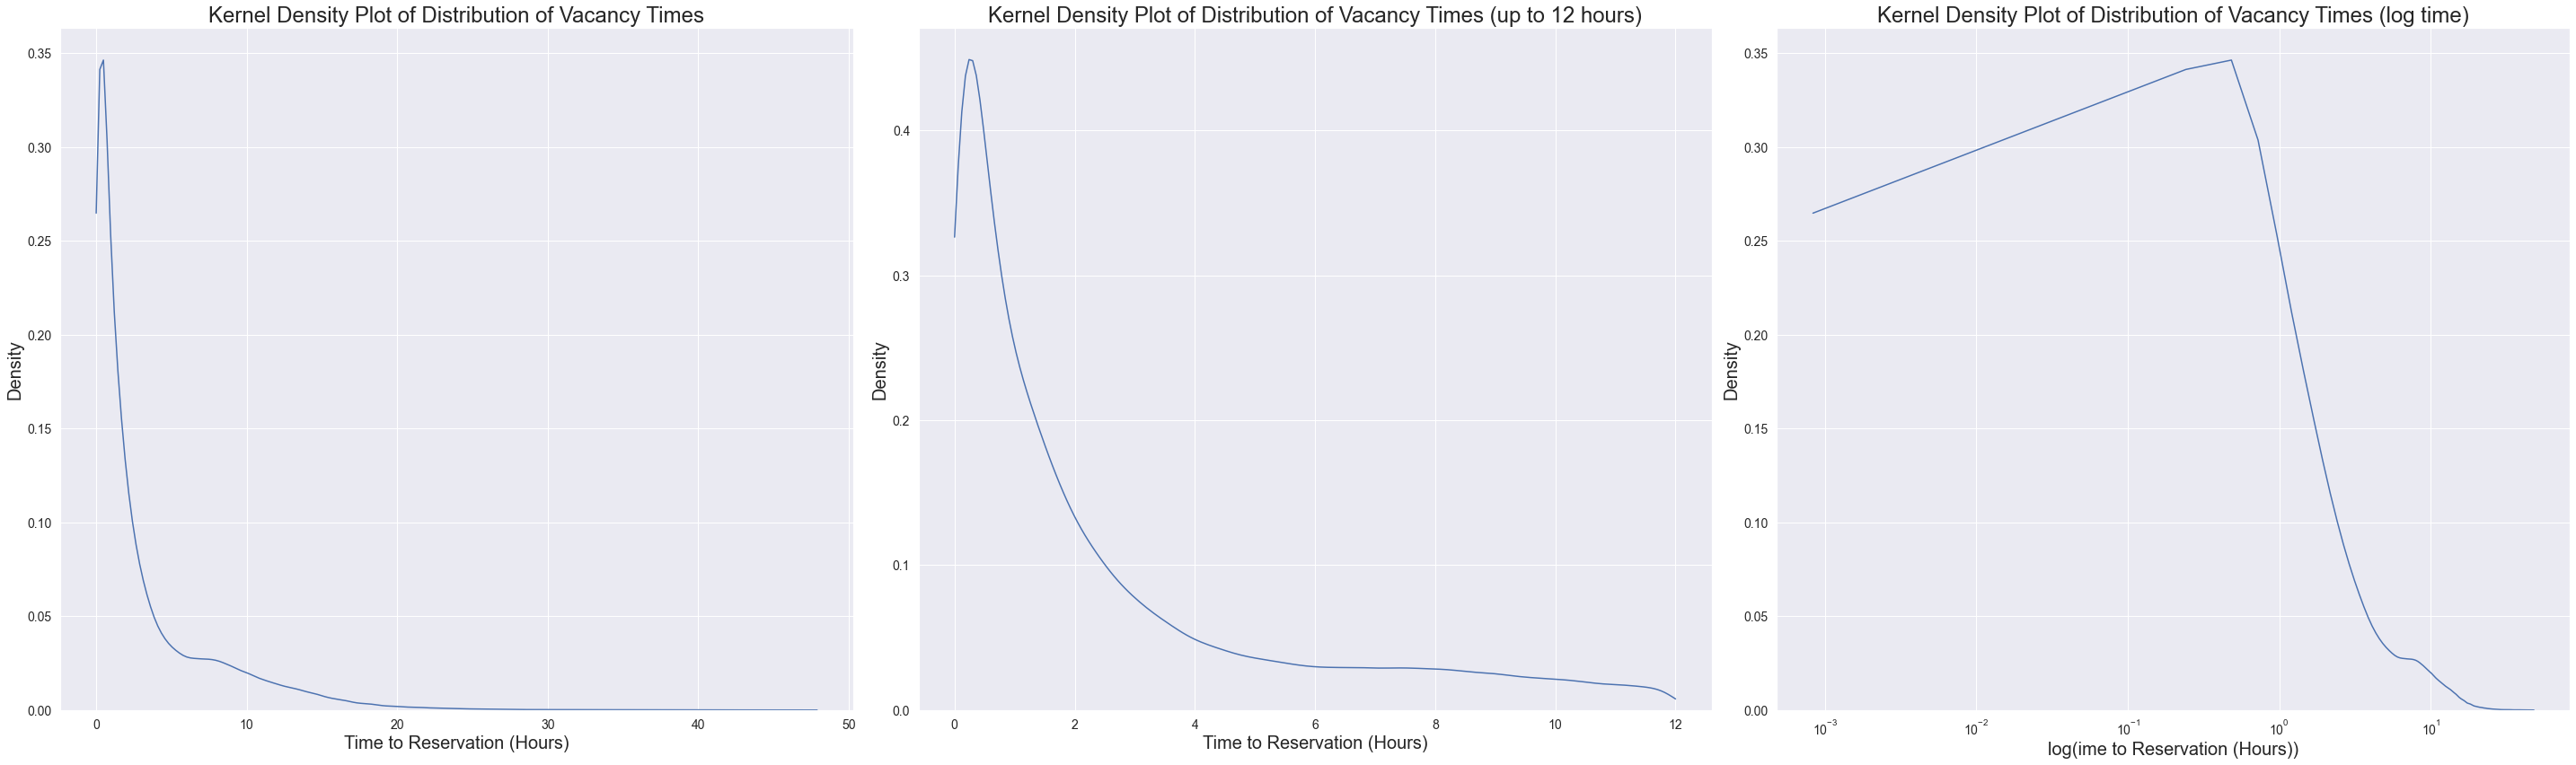

In [3]:
fig, axes = plt.subplots(1, 3,figsize=(40,12))
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0, ax=axes[0])
axes[0].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times",fontsize=24)
axes[0].set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes[0].set_ylabel("Density",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=14)
sns.kdeplot(data=df_full[df_full.time_to_reservation <= 12], x="time_to_reservation", cut = 0, ax=axes[1])
axes[1].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (up to 12 hours)",fontsize=24)
axes[1].set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes[1].set_ylabel("Density",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=14)
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0 ,ax=axes[2])
axes[2].set(xscale = 'log')
axes[2].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (log time)",fontsize=24)
axes[2].set_xlabel('log(ime to Reservation (Hours))',fontsize=20)
axes[2].set_ylabel("Density",fontsize=20)
axes[2].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Distribution.pdf')
plt.show()

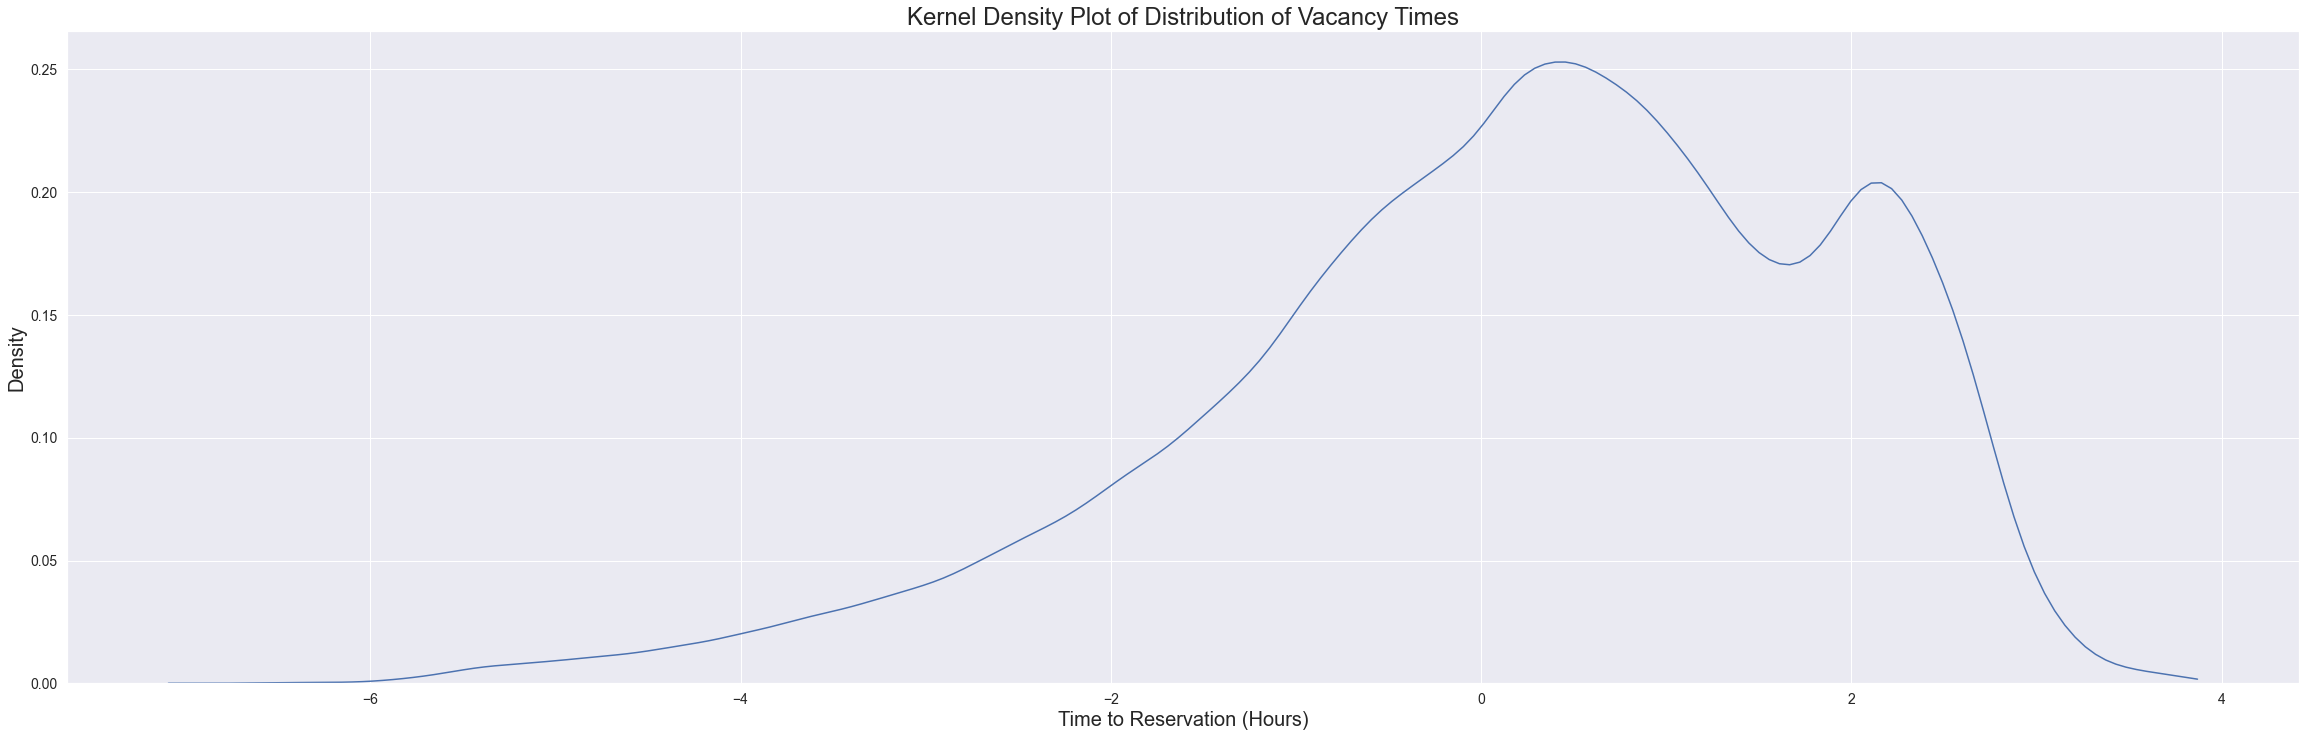

In [4]:
df_full['time_to_reservationT'] = np.log(df_full['time_to_reservation'])

fig, axes = plt.subplots(1, 1,figsize=(40,12))
sns.kdeplot(data=df_full, x="time_to_reservationT", cut = 0, ax=axes)
axes.axes.set_title("Kernel Density Plot of Distribution of Vacancy Times",fontsize=24)
axes.set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes.set_ylabel("Density",fontsize=20)
axes.tick_params(axis='both', which='major', labelsize=14)

In [5]:
df_full.time_to_reservation.mean()

3.375529124804578

In [6]:
df_full.time_to_reservation.std()

4.610559824099723

In [7]:
np.mean(df_full.time_to_reservation <= 12)

0.9374774178929899

In [8]:
df_full.time_to_reservation.quantile([0, 0.05, .25, .5, .75, 0.95,1])

0.00     0.000833
0.05     0.051667
0.25     0.450278
0.50     1.446806
0.75     4.379722
0.95    12.983889
1.00    47.911945
Name: time_to_reservation, dtype: float64

## Hour

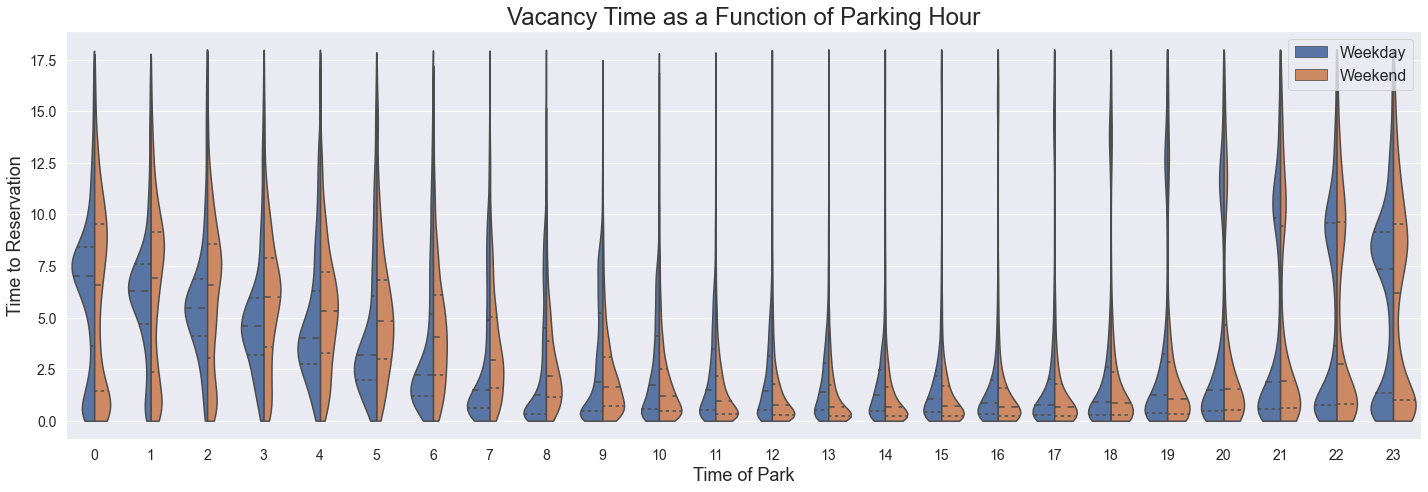

In [39]:
df_full['hour'] = df_full['index'].dt.round('H').dt.hour
f = plt.figure(figsize=(20,7))
ax = sns.violinplot(x = 'hour', y = 'time_to_reservation',  hue = 'weekend', cut = 0, split=True, inner = 'quartile', data =df_full[df_full.time_to_reservation<=18][['hour','time_to_reservation','weekend']].replace({'weekend': {0: 'Weekday', 1: 'Weekend'}}))
ax.axes.set_title("Vacancy Time as a Function of Parking Hour",fontsize=24)
ax.set_xlabel('Time of Park',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Hour.pdf')
plt.show()
df_full.drop(columns=['hour'], inplace = True)

In [12]:
df_full[['time_to_reservation', 'Time_Cos', 'Time_Sin']].corr()

time_to_reservation  Time_Cos  Time_Sin
time_to_reservation             1.000000  0.276200  0.038947
Time_Cos                        0.276200  1.000000 -0.230916
Time_Sin                        0.038947 -0.230916  1.000000

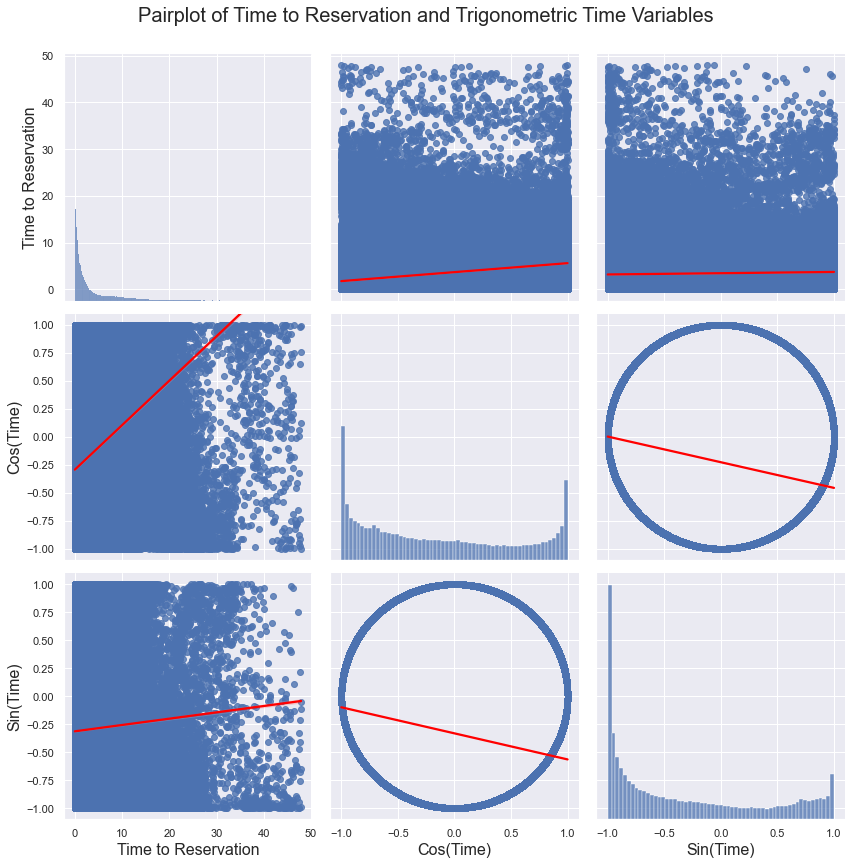

In [47]:
ax = sns.pairplot(df_full[['time_to_reservation', 'Time_Cos', 'Time_Sin']], kind="reg", height=4, plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Pairplot of Time to Reservation and Trigonometric Time Variables", y=1.00, fontsize = 20)
ax.axes[0,0].set_ylabel('Time to Reservation', fontsize = 16)
ax.axes[1,0].set_ylabel('Cos(Time)', fontsize = 16)
ax.axes[2,0].set_ylabel('Sin(Time)', fontsize = 16)
ax.axes[2,0].set_xlabel('Time to Reservation', fontsize = 16)
ax.axes[2,1].set_xlabel('Cos(Time)', fontsize = 16)
ax.axes[2,2].set_xlabel('Sin(Time)', fontsize = 16)
ax.axes[1,0].set_ylim((-1.1,1.1))
ax.axes[1,1].set_xlabel((0,1))
ax.axes[1,2].set_xlabel((-1.1,1.1))
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/TrigTime.pdf')
plt.show()

## Fuel

In [93]:
# Lower leads to faster pick-up time. Maybe the effect of rewarding "fueling" works
df_full[['time_to_reservation', 'leave_fuel']].corr()

time_to_reservation  leave_fuel
time_to_reservation             1.000000    0.067523
leave_fuel                      0.067523    1.000000

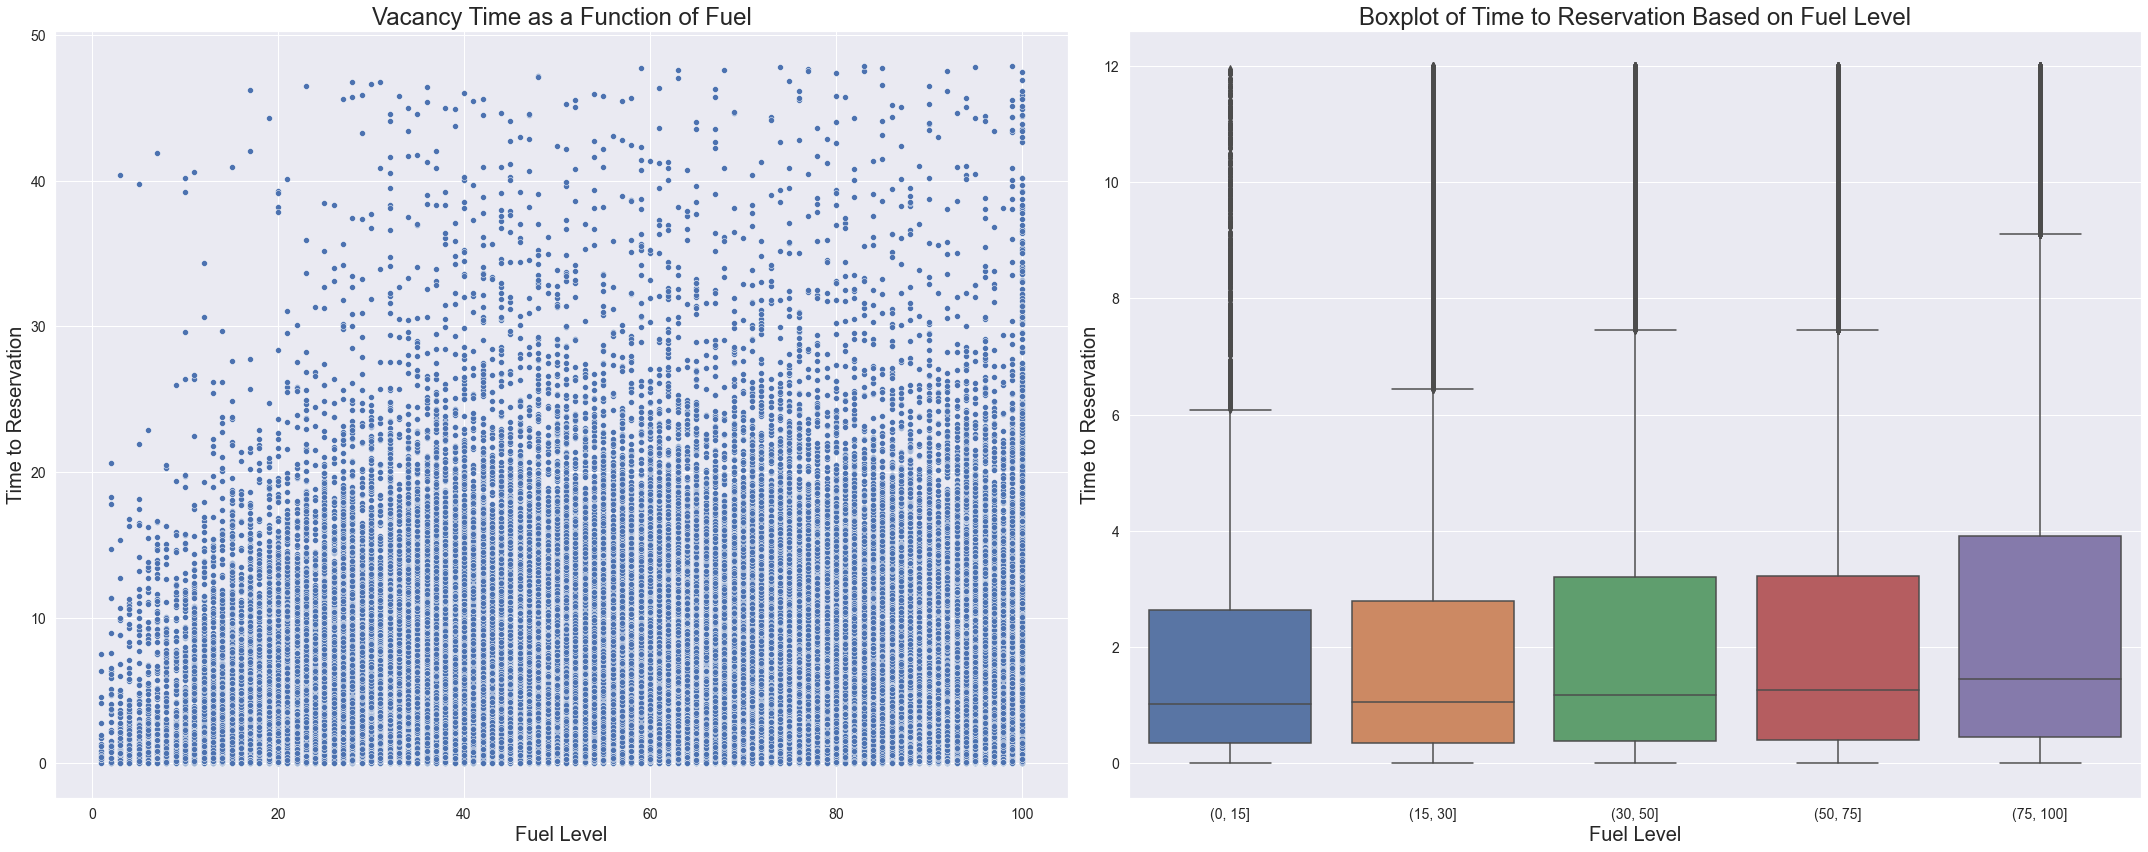

In [104]:
fig, axes = plt.subplots(1, 2,figsize=(30,12))
sns.scatterplot(x = 'leave_fuel', y ='time_to_reservation', data = df_full, ax=axes[0])
axes[0].set_title("Vacancy Time as a Function of Fuel",fontsize=24)
axes[0].set_xlabel('Fuel Level',fontsize=20)
axes[0].set_ylabel("Time to Reservation",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=14)

df_full['Fuel_bin'] = pd.cut(df_full['leave_fuel'], [0,15,30,50,75,100])
sns.boxplot(x="Fuel_bin", y="time_to_reservation", data=df_full[df_full.time_to_reservation <= 12])
axes[1].axes.set_title("Boxplot of Time to Reservation Based on Fuel Level",fontsize=24)
axes[1].set_xlabel('Fuel Level',fontsize=20)
axes[1].set_ylabel("Time to Reservation",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Fuel.pdf')
plt.show()
df_full.drop(columns=['Fuel_bin'], inplace = True)

## Engine + Weekend

In [14]:
Engine_Weekend_df = pd.concat([df_full.filter(regex = 'eng').idxmax(axis = 1),df_full[['time_to_reservation','weekend']]], axis = 1).rename(columns = {0:'Engine'})
Engine_Weekend_df['weekend'] = Engine_Weekend_df['weekend'].replace({0: 'Weekday', 1: 'Weekend'})

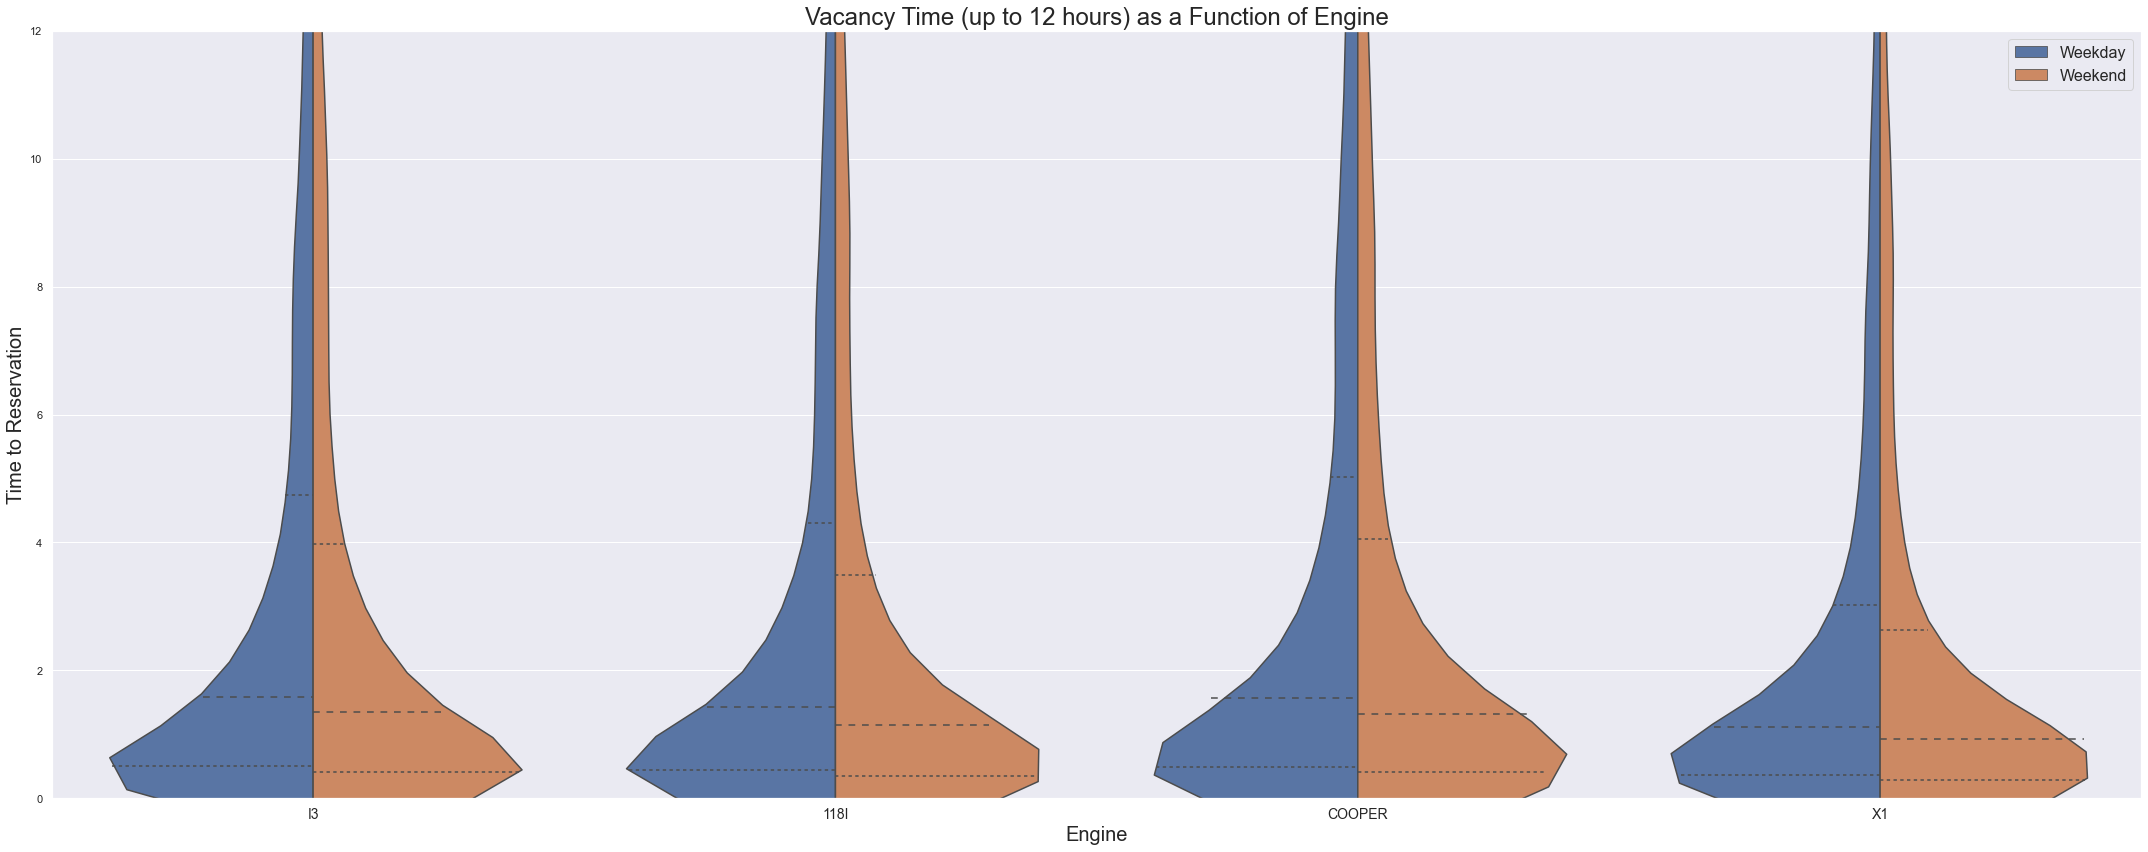

In [144]:
f = plt.figure(figsize=(30,12))
ax = sns.violinplot(x = 'Engine', y = 'time_to_reservation', hue = 'weekend',  split=True,data = Engine_Weekend_df, inner = 'quartile')
ax.axes.set_title("Vacancy Time (up to 12 hours) as a Function of Engine",fontsize=24)
ax.set_xlabel('Engine',fontsize=20)
ax.set_ylabel("Time to Reservation",fontsize=20)
ax.legend(fontsize=16)
ax.set_xticklabels([x.get_text()[4:] for x in ax.get_xticklabels()], fontsize=14)
ax.set(ylim=(0,12))
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Engine.pdf')
plt.show()

In [89]:
Engine_Weekend_df.pivot_table(index = 'Engine', columns = 'weekend', values = 'time_to_reservation')
# Price differentation

weekend      Weekday   Weekend
Engine                        
eng_118I    3.321004  3.028229
eng_COOPER  3.667417  3.328963
eng_I3      3.488908  3.299735
eng_X1      2.558086  2.383819

## Degree

In [146]:
# More cars close
df_full[['time_to_reservation', 'degree']].corr()

time_to_reservation   degree
time_to_reservation              1.00000  0.11658
degree                           0.11658  1.00000

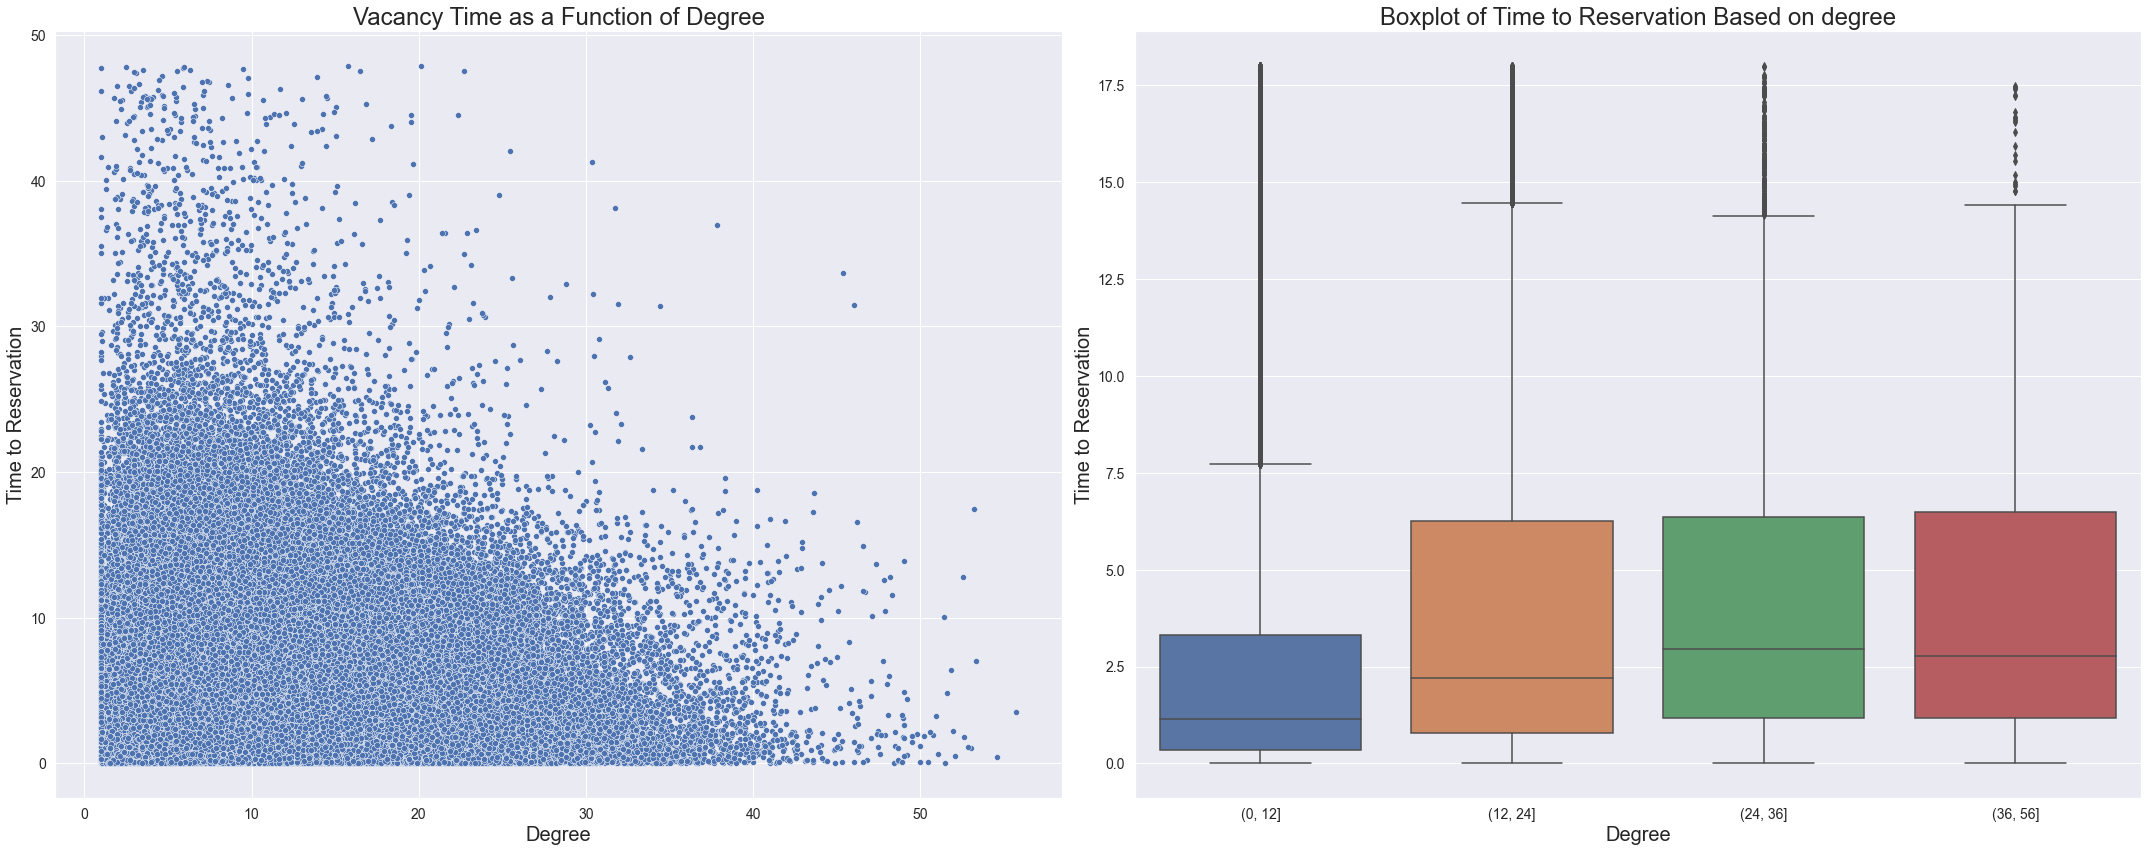

In [154]:
fig, axes = plt.subplots(1, 2,figsize=(30,12))
sns.scatterplot(x = 'degree', y ='time_to_reservation', data = df_full, ax=axes[0])
axes[0].set_title("Vacancy Time as a Function of Degree",fontsize=24)
axes[0].set_xlabel('Degree',fontsize=20)
axes[0].set_ylabel("Time to Reservation",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=14)

df_full['Degree_bin'] = pd.cut(df_full['degree'], [0,12,24,36,56])
sns.boxplot(x="Degree_bin", y="time_to_reservation", data=df_full[df_full.time_to_reservation<18])
axes[1].axes.set_title("Boxplot of Time to Reservation Based on degree",fontsize=24)
axes[1].set_xlabel('Degree',fontsize=20)
axes[1].set_ylabel("Time to Reservation",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Degree.pdf')
plt.show()
df_full.drop(columns=['Degree_bin'], inplace = True)

## Zone

In [19]:
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','degree']]], axis = 1).rename(columns = {0:'Zone'})

[]

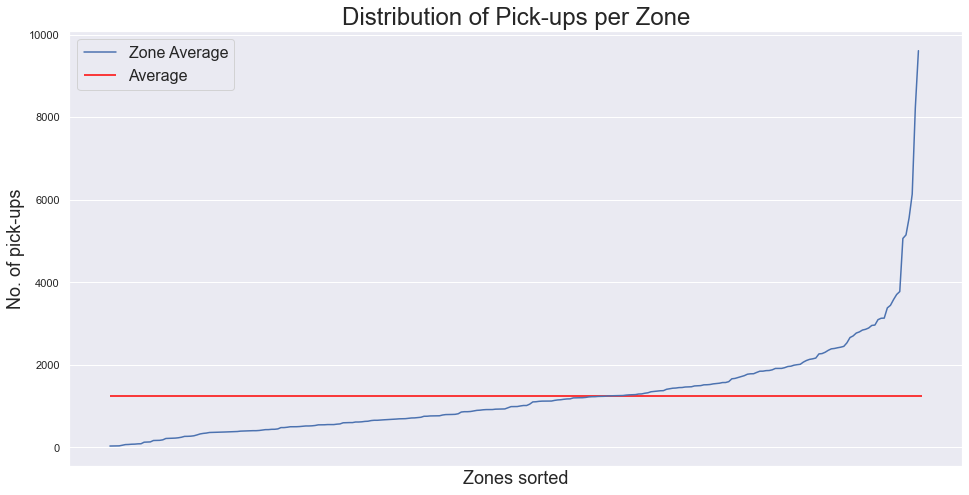

In [24]:
# Count per Zone
f = plt.figure(figsize=(16,8))
Zone_df.Zone.value_counts().sort_values(ascending = True).plot(label = 'Zone Average')
ax = plt.hlines(y = Zone_df.Zone.value_counts().sort_values(ascending = True).mean(),xmin = 0, xmax=Zone_df.Zone.nunique(), colors = 'red', label = 'Average')
ax.axes.set_title("Distribution of Pick-ups per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("No. of pick-ups",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

In [158]:
Zone_time = Zone_df.groupby('Zone').mean().sort_values(by = 'time_to_reservation')
Zone_time['Count'] = Zone_time.index.map(dict(Zone_df.Zone.value_counts()))

time_to_reservation     degree  Count
Zone                                            
lz_102184             0.921950  12.700080   1292
lz_102121             1.159903  13.710118   2351
lz_102151             1.164936  11.499416   1227
lz_102161             1.167401  13.019858    910
lz_102122             1.263664  14.142530   1047
...                        ...        ...    ...
lz_155017             9.396325   2.449789    340
lz_102322            10.517806   8.182583     90
lz_159053            12.279907   2.765415     36
lz_159085            14.006750   3.347079     53
lz_167062            14.165676   2.253137     37

[261 rows x 3 columns]

In [26]:
# Zone + degree
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Deg_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','degree']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

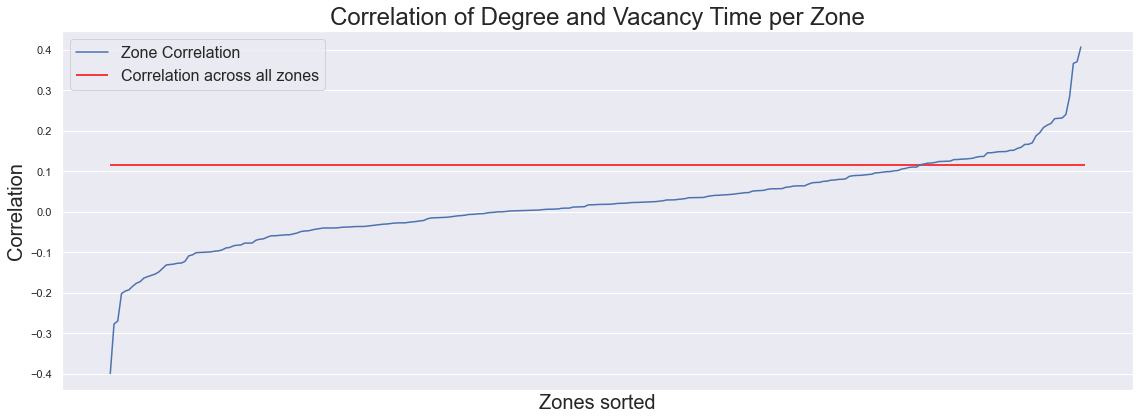

In [155]:
f = plt.figure(figsize=(16,6))
Deg_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'degree']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Degree and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=20)
ax.axes.set_ylabel("Correlation",fontsize=20)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/DegreeWithinZones.pdf')
plt.plot()

In [33]:
# Number of zones with stronger correlation
np.sum(Deg_corr_Zone > df_full[['time_to_reservation', 'degree']].corr().iloc[0,1])

221

[]

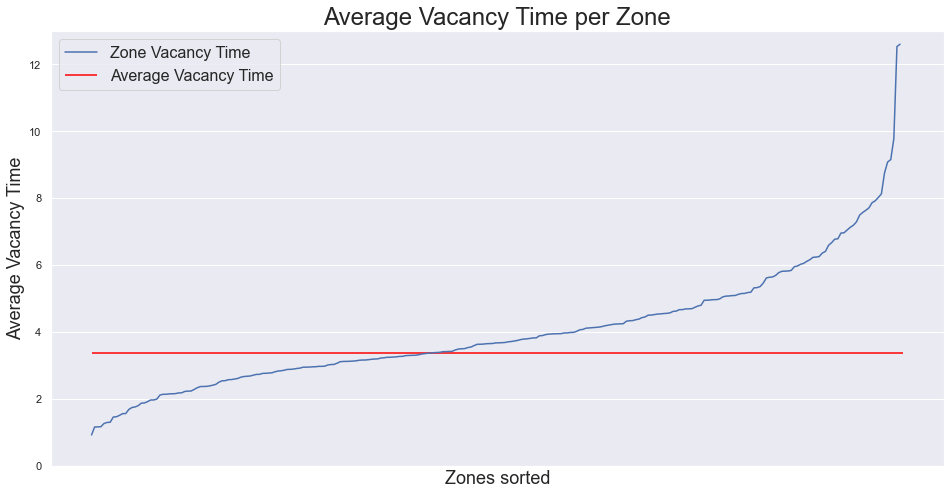

In [38]:
Zone_average = pd.Series({Zone: sub_df.time_to_reservation.mean() for Zone, sub_df in ZoneID_dict.items()}).sort_values()
f = plt.figure(figsize=(16,8))
ax = Zone_average.plot(label = 'Zone Vacancy Time')
ax = plt.hlines(y=df_full.time_to_reservation.mean(),xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Average Vacancy Time')
ax.axes.set_title("Average Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Average Vacancy Time",fontsize=18)
ax.axes.set_xticks([])
ax.axes.set_ylim(0,13)
plt.legend(fontsize = 16)
plt.plot()

In [39]:
avg_dict = {int(z[3:]): avg for z,avg in dict(Zone_average).items()}

gdf = gpd.read_file("../Zonekort/LTM_Zone3/zones_level3.shp").to_crs(epsg=4326)
gdf['Avg_Zone'] = gdf.zoneid.map(avg_dict)
gdf = gdf[~gdf.Avg_Zone.isna()]
gdf

OBJECTID  komnr  zoneid                 zonenavn  \
367       7464    147  147131    Frederiksberg Øst S Ø   
427       6581    101  102122               Amagertorv   
428       6582    101  102325            Svanemøllen V   
483       6660    101  102222            Amalienborg Ø   
484       6661    101  102863            Kgs Enghave N   
...        ...    ...     ...                      ...   
3664     11339    101  102454        Ydre Nørrebro VSV   
3665     11340    101  102852                Sydhavn V   
3666     11379    157  157262  Jægersborg-Vangede Midt   
3667     11400    169  169042  Høje Taastrup Station S   
3669     11414    173  173061         Lyngby C+Vest NØ   

                                          zonedescri  numadresse  \
367                            Frederiksberg Kommune         296   
427   Københavns Kommune, indre by og Christianshavn         506   
428                          Københavns Kommune Nord         326   
483   Københavns Kommune, indre by og Christianshavn         577   
484         Københavns Kommune syd for Frederiksberg         457   
...                                              ...         ...   
3664                         Københavns Kommune Nord         186   
3665        Københavns Kommune syd for Frederiksberg         274   
3666                                Gentofte Kommune         142   
3667                           Høje Taastrup Kommune         172   
3669                          Lyngby-Taarbæk Kommune          51   

        Shape_Leng    Shape_Area  \
367    2146.936913  2.272174e+05   
427    1651.615236  1.596530e+05   
428    1835.852414  2.050950e+05   
483   11296.760990  4.286966e+05   
484    3688.931740  5.227625e+05   
...            ...           ...   
3664   1718.362472  1.809837e+05   
3665   2537.945040  2.286231e+05   
3666   2176.893379  2.351585e+05   
3667   4554.836303  1.127119e+06   
3669   2305.023924  2.337766e+05   

                                               geometry  Avg_Zone  
367   POLYGON ((12.54521 55.67558, 12.54716 55.67512...  2.137663  
427   POLYGON ((12.57804 55.68069, 12.57817 55.68060...  1.263664  
428   POLYGON ((12.57741 55.70910, 12.57735 55.70909...  3.413525  
483   MULTIPOLYGON (((12.58925 55.68615, 12.59628 55...  1.685292  
484   POLYGON ((12.53414 55.64901, 12.53370 55.64868...  2.946895  
...                                                 ...       ...  
3664  POLYGON ((12.54180 55.69329, 12.54090 55.69239...  3.715492  
3665  POLYGON ((12.53904 55.65353, 12.53943 55.65236...  3.257527  
3666  POLYGON ((12.51968 55.75631, 12.52216 55.75375...  2.409282  
3667  POLYGON ((12.28177 55.64188, 12.28176 55.64185...  7.050647  
3669  POLYGON ((12.51075 55.77281, 12.51375 55.77168...  4.335997  

[261 rows x 10 columns]

In [42]:
# Colormap
#cmap = matplotlib.cm.get_cmap('viridis')
cmap = cm.LinearColormap(colors=['green','yellow','red'], index=[min(gdf['Avg_Zone']),5,max(gdf['Avg_Zone'])],vmin=min(gdf['Avg_Zone']),vmax=max(gdf['Avg_Zone']), caption = 'Average Vacancy Time')

# Map
m = folium.Map(location=[55.68, 12.568337], zoom_start=12, prefer_canvas=True, width=2000,height=1200)

for i,(_, r) in enumerate(gdf[~gdf.Avg_Zone.isna()].iterrows()):
    sim_geo = gpd.GeoDataFrame(r[['geometry','Avg_Zone']]).T
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'color': matplotlib.colors.rgb2hex(cmap(x['properties']['Avg_Zone'])), 'fillOpacity': 0.6})

    geo_j.add_to(m)

m.add_child(cmap)
folium.map.LayerControl('topleft', collapsed=True).add_to(m)
m

## Stations

In [43]:
df_full[['time_to_reservation', 'dist_to_station']].corr() #Look into zone split 

time_to_reservation  dist_to_station
time_to_reservation             1.000000         0.115583
dist_to_station                 0.115583         1.000000

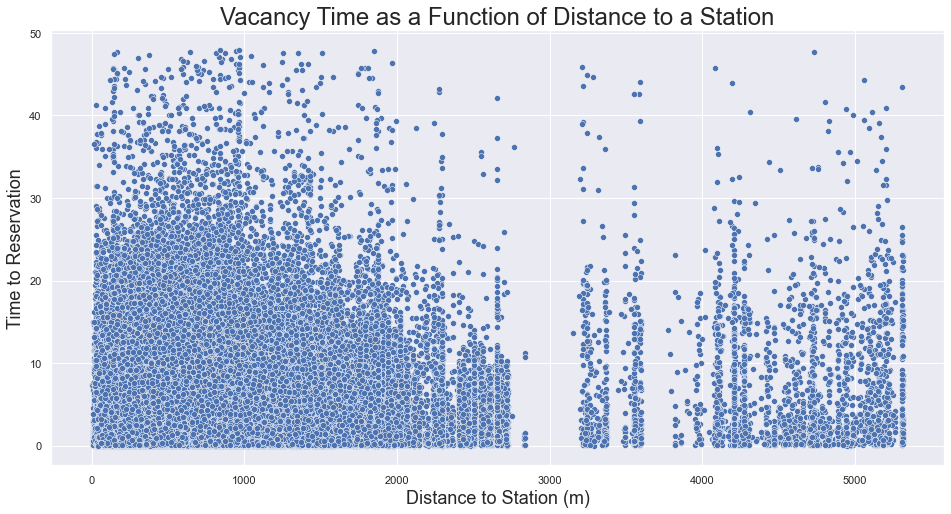

In [45]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'dist_to_station', y ='time_to_reservation', data = df_full)
ax.axes.set_title("Vacancy Time as a Function of Distance to a Station",fontsize=24)
ax.set_xlabel('Distance to Station (m)',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show()

In [52]:
# Zone + dist
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','dist_to_station']]], axis = 1).rename(columns = {0:'Zone'})
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Dist_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','dist_to_station']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

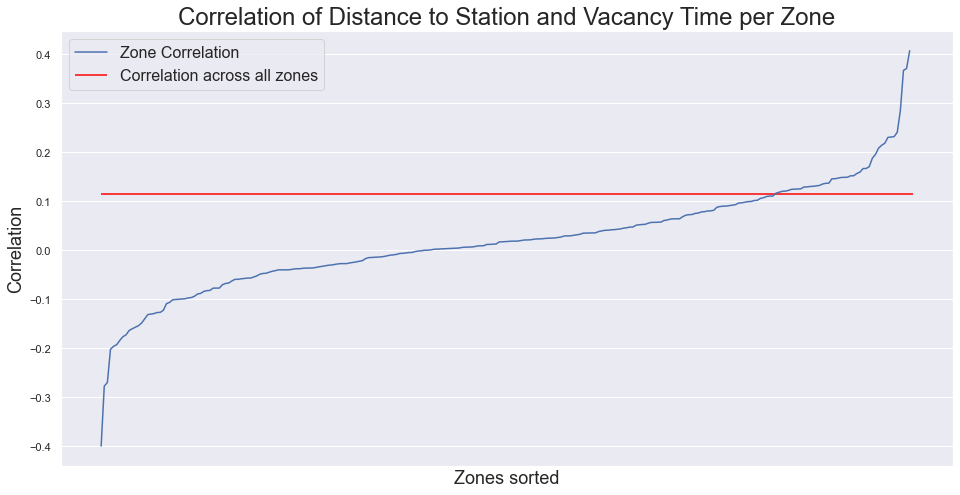

In [53]:
f = plt.figure(figsize=(16,8))
Dist_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'dist_to_station']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Distance to Station and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Correlation",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

## Weather

Correlation matrices

In [51]:
pd.read_csv('data/processed/weather.csv', index_col=0).describe()

mean_temp  mean_wind_speed   acc_precip  bright_sunshine  \
count  3096.000000      3096.000000  3096.000000      3096.000000   
mean     10.772125         3.816021     0.103036         8.132720   
std       5.338534         1.948189     0.445031        17.506084   
min      -2.000000         0.100000     0.000000         0.000000   
25%       6.600000         2.300000     0.000000         0.000000   
50%      10.400000         3.700000     0.000000         0.000000   
75%      14.300000         5.100000     0.000000         1.225000   
max      29.100000        11.500000     7.900000        60.000000   

       mean_pressure  mean_relative_hum  mean_cloud_cover  
count    3096.000000        3096.000000       3096.000000  
mean     1010.468895          83.975872         63.535853  
std        10.182477          11.869056         38.635800  
min       981.100000          34.900000          0.000000  
25%      1004.600000          77.600000         21.000000  
50%      1011.550000          86.700000         86.000000  
75%      1017.800000          93.500000         98.000000  
max      1031.700000          99.400000        100.000000

In [52]:
def df_autocorr(df, lag=1, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

df_autocorr(pd.read_csv('data/processed/weather.csv', index_col=0))

mean_temp            0.993705
mean_wind_speed      0.957304
acc_precip           0.560951
bright_sunshine      0.822162
mean_pressure        0.998763
mean_relative_hum    0.959843
mean_cloud_cover     0.855122
dtype: float64

In [53]:
df_full[['time_to_reservation']+weather_var[:7]].corr()

time_to_reservation  mean_temp  mean_wind_speed  \
time_to_reservation             1.000000  -0.045196        -0.070989   
mean_temp                      -0.045196   1.000000        -0.043399   
mean_wind_speed                -0.070989  -0.043399         1.000000   
acc_precip                     -0.013631   0.022338         0.064492   
bright_sunshine                -0.099004   0.396642         0.003991   
mean_pressure                   0.017433   0.313101        -0.289799   
mean_relative_hum               0.067829  -0.456802        -0.144428   
mean_cloud_cover               -0.002163  -0.228696         0.189008   

                     acc_precip  bright_sunshine  mean_pressure  \
time_to_reservation   -0.013631        -0.099004       0.017433   
mean_temp              0.022338         0.396642       0.313101   
mean_wind_speed        0.064492         0.003991      -0.289799   
acc_precip             1.000000        -0.119412      -0.156766   
bright_sunshine       -0.119412         1.000000       0.338737   
mean_pressure         -0.156766         0.338737       1.000000   
mean_relative_hum      0.209317        -0.560047      -0.402366   
mean_cloud_cover       0.199918        -0.567075      -0.414890   

                     mean_relative_hum  mean_cloud_cover  
time_to_reservation           0.067829         -0.002163  
mean_temp                    -0.456802         -0.228696  
mean_wind_speed              -0.144428          0.189008  
acc_precip                    0.209317          0.199918  
bright_sunshine              -0.560047         -0.567075  
mean_pressure                -0.402366         -0.414890  
mean_relative_hum             1.000000          0.474080  
mean_cloud_cover              0.474080          1.000000

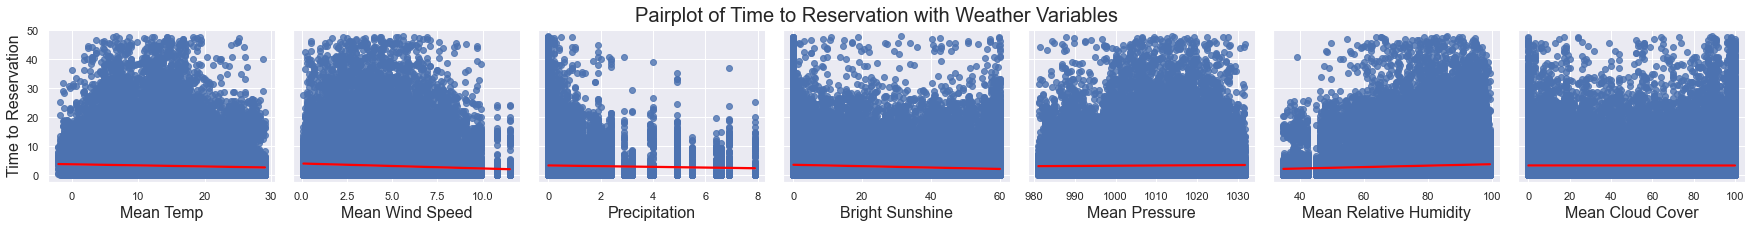

In [67]:
ax = sns.pairplot(df_full, y_vars=['time_to_reservation'], x_vars=weather_var[:7], height = 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Pairplot of Time to Reservation with Weather Variables", y=0.9, fontsize = 20)
ax.axes[0,0].set_ylabel('Time to Reservation', fontsize = 16)
ax.axes[0,0].set_xlabel('Mean Temp', fontsize = 16)
ax.axes[0,1].set_xlabel('Mean Wind Speed', fontsize = 16)
ax.axes[0,2].set_xlabel('Precipitation', fontsize = 16)
ax.axes[0,3].set_xlabel('Bright Sunshine', fontsize = 16)
ax.axes[0,4].set_xlabel('Mean Pressure', fontsize = 16)
ax.axes[0,5].set_xlabel('Mean Relative Humidity', fontsize = 16)
ax.axes[0,6].set_xlabel('Mean Cloud Cover', fontsize = 16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/WeatherCorr.pdf')
plt.show()

## Old weather

In [33]:
df_full[['time_to_reservation']+weather_var[7:14]].corr('spearman') # spearman correlation

time_to_reservation  Avg_mean_temp  \
time_to_reservation               1.000000      -0.071145   
Avg_mean_temp                    -0.071145       1.000000   
Avg_mean_wind_speed              -0.079667      -0.021324   
Avg_acc_precip                    0.152955      -0.020697   
Avg_bright_sunshine               0.022307       0.402345   
Avg_mean_pressure                 0.019328       0.287268   
Avg_mean_relative_hum             0.098575      -0.312242   
Avg_mean_cloud_cover             -0.051241      -0.222441   

                       Avg_mean_wind_speed  Avg_acc_precip  \
time_to_reservation              -0.079667        0.152955   
Avg_mean_temp                    -0.021324       -0.020697   
Avg_mean_wind_speed               1.000000        0.163529   
Avg_acc_precip                    0.163529        1.000000   
Avg_bright_sunshine              -0.009523       -0.215428   
Avg_mean_pressure                -0.290531       -0.342462   
Avg_mean_relative_hum            -0.145880        0.377366   
Avg_mean_cloud_cover              0.221875        0.365567   

                       Avg_bright_sunshine  Avg_mean_pressure  \
time_to_reservation               0.022307           0.019328   
Avg_mean_temp                     0.402345           0.287268   
Avg_mean_wind_speed              -0.009523          -0.290531   
Avg_acc_precip                   -0.215428          -0.342462   
Avg_bright_sunshine               1.000000           0.359752   
Avg_mean_pressure                 0.359752           1.000000   
Avg_mean_relative_hum            -0.584611          -0.383715   
Avg_mean_cloud_cover             -0.595946          -0.417783   

                       Avg_mean_relative_hum  Avg_mean_cloud_cover  
time_to_reservation                 0.098575             -0.051241  
Avg_mean_temp                      -0.312242             -0.222441  
Avg_mean_wind_speed                -0.145880              0.221875  
Avg_acc_precip                      0.377366              0.365567  
Avg_bright_sunshine                -0.584611             -0.595946  
Avg_mean_pressure                  -0.383715             -0.417783  
Avg_mean_relative_hum               1.000000              0.526448  
Avg_mean_cloud_cover                0.526448              1.000000

In [35]:
pd.concat([df_full['time_to_reservation'],np.log(df_full[weather_var[:7]])],axis = 1)

time_to_reservation  mean_temp  mean_wind_speed  acc_precip  \
0                  7.722778   2.653242         0.587787        -inf   
1                  6.774445   2.653242         0.587787        -inf   
2                  6.522222   2.653242         0.587787        -inf   
3                  5.100833   2.653242         0.587787        -inf   
4                  6.211945   2.653242         0.587787        -inf   
...                     ...        ...              ...         ...   
326587             6.307500   1.526056         0.993252        -inf   
326588             7.528611   1.526056         0.993252        -inf   
326589             7.865556   1.526056         0.993252        -inf   
326590             5.028056   1.526056         0.993252        -inf   
326591             0.312222   1.526056         0.993252        -inf   

        bright_sunshine  mean_pressure  mean_relative_hum  mean_cloud_cover  
0                  -inf       6.921461           4.298645          2.833213  
1                  -inf       6.921461           4.298645          2.833213  
2                  -inf       6.921461           4.298645          2.833213  
3                  -inf       6.921461           4.298645          2.833213  
4                  -inf       6.921461           4.298645          2.833213  
...                 ...            ...                ...               ...  
326587             -inf       6.927264           4.545420          3.912023  
326588             -inf       6.927264           4.545420          3.912023  
326589             -inf       6.927264           4.545420          3.912023  
326590             -inf       6.927264           4.545420          3.912023  
326591             -inf       6.927264           4.545420          3.912023  

[326586 rows x 8 columns]

In [29]:
pd.concat([df_full['time_to_reservation'],np.log(df_full[weather_var[14:21]])],axis = 1).corr(method = 'spearman')

time_to_reservation  Avg_Index_mean_temp  \
time_to_reservation                     1.000000            -0.055310   
Avg_Index_mean_temp                    -0.055310             1.000000   
Avg_Index_mean_wind_speed              -0.068524            -0.036507   
Avg_Index_acc_precip                   -0.092695             0.160263   
Avg_Index_bright_sunshine              -0.026996             0.295638   
Avg_Index_mean_pressure                 0.019886             0.295942   
Avg_Index_mean_relative_hum             0.091381            -0.300432   
Avg_Index_mean_cloud_cover             -0.015570            -0.235810   

                             Avg_Index_mean_wind_speed  Avg_Index_acc_precip  \
time_to_reservation                          -0.068524             -0.092695   
Avg_Index_mean_temp                          -0.036507              0.160263   
Avg_Index_mean_wind_speed                     1.000000              0.063734   
Avg_Index_acc_precip                          0.063734              1.000000   
Avg_Index_bright_sunshine                     0.027837             -0.144262   
Avg_Index_mean_pressure                      -0.293509             -0.083143   
Avg_Index_mean_relative_hum                  -0.129733              0.172968   
Avg_Index_mean_cloud_cover                    0.195375              0.117413   

                             Avg_Index_bright_sunshine  \
time_to_reservation                          -0.026996   
Avg_Index_mean_temp                           0.295638   
Avg_Index_mean_wind_speed                     0.027837   
Avg_Index_acc_precip                         -0.144262   
Avg_Index_bright_sunshine                     1.000000   
Avg_Index_mean_pressure                       0.375806   
Avg_Index_mean_relative_hum                  -0.517627   
Avg_Index_mean_cloud_cover                   -0.676808   

                             Avg_Index_mean_pressure  \
time_to_reservation                         0.019886   
Avg_Index_mean_temp                         0.295942   
Avg_Index_mean_wind_speed                  -0.293509   
Avg_Index_acc_precip                       -0.083143   
Avg_Index_bright_sunshine                   0.375806   
Avg_Index_mean_pressure                     1.000000   
Avg_Index_mean_relative_hum                -0.397192   
Avg_Index_mean_cloud_cover                 -0.386851   

                             Avg_Index_mean_relative_hum  \
time_to_reservation                             0.091381   
Avg_Index_mean_temp                            -0.300432   
Avg_Index_mean_wind_speed                      -0.129733   
Avg_Index_acc_precip                            0.172968   
Avg_Index_bright_sunshine                      -0.517627   
Avg_Index_mean_pressure                        -0.397192   
Avg_Index_mean_relative_hum                     1.000000   
Avg_Index_mean_cloud_cover                      0.541553   

                             Avg_Index_mean_cloud_cover  
time_to_reservation                           -0.015570  
Avg_Index_mean_temp                           -0.235810  
Avg_Index_mean_wind_speed                      0.195375  
Avg_Index_acc_precip                           0.117413  
Avg_Index_bright_sunshine                     -0.676808  
Avg_Index_mean_pressure                       -0.386851  
Avg_Index_mean_relative_hum                    0.541553  
Avg_Index_mean_cloud_cover                     1.000000

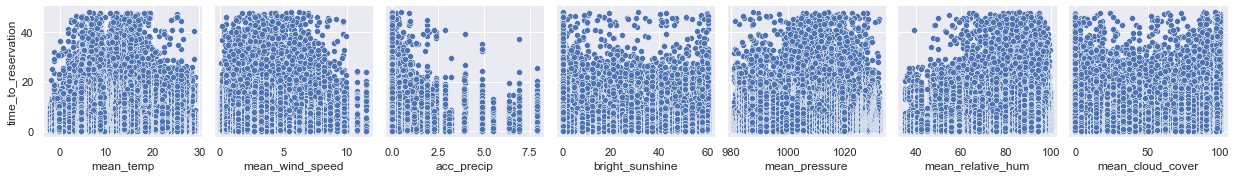

In [34]:
sns.pairplot(df_full, y_vars=['time_to_reservation'], x_vars=weather_var[:7])